In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
from IPython.display import display
import scipy.stats
import sys
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import csv

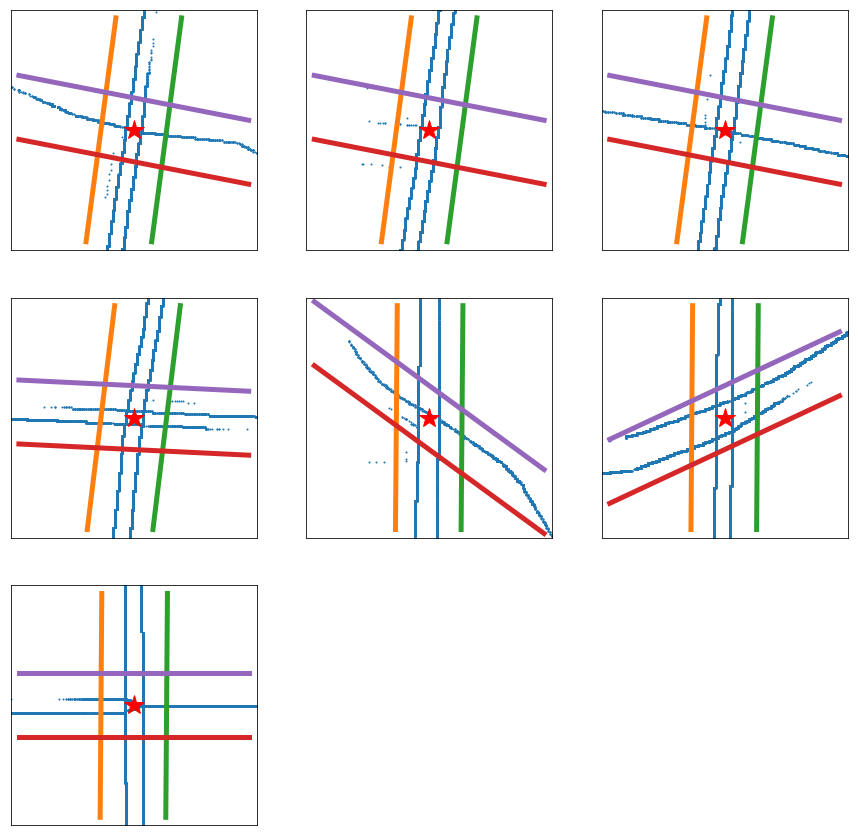

In [2]:
# this part import data of trajectories and locations of signals. 
# data: trajectories
# cross_location: location of crosses

data = read_csv('trajectories.csv', skiprows=0, skipinitialspace=True)
data = data.sort_values(by = ['vehicle_id','time'])
cross_location = read_csv('coordinates_cross.csv', skiprows=0, skipinitialspace=True)
cross_location.x_coordinate.iloc[0] += -1; cross_location.y_coordinate.iloc[0] += 18; 
cross_location.x_coordinate.iloc[1] += 3; cross_location.y_coordinate.iloc[1] += 50; 
cross_location.x_coordinate.iloc[2] += -3; cross_location.y_coordinate.iloc[2] += 12; 
cross_location.x_coordinate.iloc[3] += 1; cross_location.y_coordinate.iloc[3] += 4; 
cross_location.x_coordinate.iloc[4] += -6; cross_location.y_coordinate.iloc[4] += 13; 
cross_location.x_coordinate.iloc[5] += 7; cross_location.y_coordinate.iloc[5] += 61; 
cross_location.x_coordinate.iloc[6] += 6; cross_location.y_coordinate.iloc[6] += -14; 
k = np.array([[5.5,5.5,5.5,6,90,100,100],[-0.2,-0.2,-0.2,-0.05,-0.75,0.48,0]])
offset = 20
OFFSET = 50
plt.figure(figsize=(15,15)) 
for i in range(7):
    plt.subplot(3,3,i+1)
    plt.xticks([]); plt.yticks([])
    a = cross_location.x_coordinate.iloc[i] - offset;
    b = cross_location.x_coordinate.iloc[i] + offset;
    c = cross_location.y_coordinate.iloc[i] - offset;
    d = cross_location.y_coordinate.iloc[i] + offset;
    plt.plot(data.x_coordinate, data.y_coordinate,'.',markersize = 2)
    plt.plot([a - OFFSET / k[0,i], a + OFFSET / k[0,i]], [c - OFFSET, d + OFFSET], linewidth = 5, markersize = 1)
    plt.plot([b - OFFSET / k[0,i], b + OFFSET / k[0,i]], [c - OFFSET, d + OFFSET], linewidth = 5, markersize = 1)
    plt.plot([a - OFFSET, b + OFFSET], [c - (OFFSET + offset) * k[1,i], c + (OFFSET + offset) * k[1,i]], linewidth = 5, markersize = 1)
    plt.plot([a - OFFSET, b + OFFSET], [d - (OFFSET + offset) * k[1,i], d + (OFFSET + offset)* k[1,i]], linewidth = 5, markersize = 1)
    plt.plot(cross_location.x_coordinate.iloc[i], cross_location.y_coordinate.iloc[i],'r*',markersize = 20)
    plt.xlim([a - 1.1 * OFFSET, b + 1.1 * OFFSET])
    plt.ylim([c - 1.1 * OFFSET, d + 1.1 * OFFSET])

In [3]:
# this part calculates the 10 time intervals, they are stored in data_time
# data_time: min and max times of the 10 intervals

data_time = np.zeros((10,2))
data_time_1 = data.time[data.time>1493800000][data.time<1493900000]
data_time_2 = data.time[data.time>1493900000][data.time<1494000000]
data_time_3 = data.time[data.time>1494100000][data.time<1494250000]
data_time_4 = data.time[data.time>1494250000][data.time<1494330000]
data_time_5 = data.time[data.time>1494330000][data.time<1494420000]
data_time_6 = data.time[data.time>1494420000][data.time<1494500000]
data_time_7 = data.time[data.time>1494500000][data.time<1494600000]
data_time_8 = data.time[data.time>1494600000][data.time<1494860000]
data_time_9 = data.time[data.time>1494860000][data.time<1494920000]
data_time_10 = data.time[data.time>1494920000][data.time<1495020000]
data_time[0] = [min(data_time_1), max(data_time_1)]
data_time[1] = [min(data_time_2), max(data_time_2)]
data_time[2] = [min(data_time_3), max(data_time_3)]
data_time[3] = [min(data_time_4), max(data_time_4)]
data_time[4] = [min(data_time_5), max(data_time_5)]
data_time[5] = [min(data_time_6), max(data_time_6)]
data_time[6] = [min(data_time_7), max(data_time_7)]
data_time[7] = [min(data_time_8), max(data_time_8)]
data_time[8] = [min(data_time_9), max(data_time_9)]
data_time[9] = [min(data_time_10), max(data_time_10)]

count = 0
for i in range(10):
    count = count + len(data.time[data.time>=data_time[i][0]][data.time<=data_time[i][1]])
if count == len(data.time):
    print('Total number of data proves to be ture.')
#print(data_time)

Total number of data proves to be ture.


17.1334559547


NameError: name 'data_deltaT' is not defined

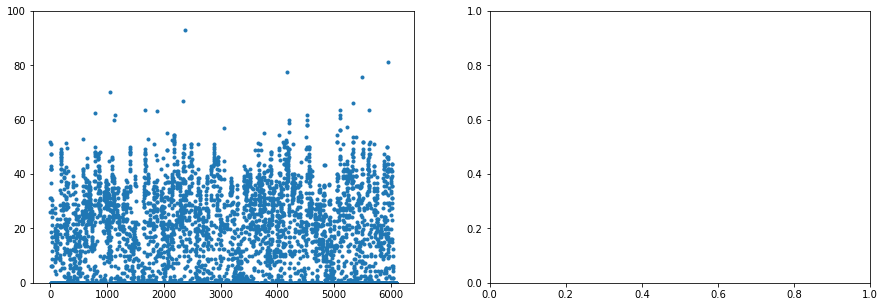

In [4]:
plt.figure(figsize = (15,5))
distance = np.zeros(int(len(data) / 100))
count = 0
for i in range(int(len(data) / 100)):
    if data.vehicle_id.iloc[i] == data.vehicle_id.iloc[i+1]:
        distance[count] = np.sqrt(np.square(data.x_coordinate.iloc[i]-data.x_coordinate.iloc[i+1])+np.square(data.y_coordinate.iloc[i]-data.y_coordinate.iloc[i+1]))
        count += 1
plt.subplot(1,2,1)
plt.plot(distance,'.')
plt.ylim(0,100)
print(np.average(distance))

plt.subplot(1,2,2)
plt.plot(data_deltaT,'.')
data_delta = list(filter(lambda x: x >= 12, data_deltaT))
plt.ylim(0,15)
len(data_delta)

In [5]:
#this part output flow thourgh a verticle line
# x_line: x_coordinate of the line
# y_A,y_B: y_coordinate of A,B; A must be lower than B
# direction: 0 indicates left to right; 1 indicates right to left
# return average and satndard difference of flow from calculation in 10 intervals 

def flow_verticle(k,j, x_line, y_A, y_B, direction):
    data_record = [];
    data_temp = data[data.time>=data_time[j][0]][data.time<=data_time[j][1]][data.y_coordinate<=(y_B+OFFSET)][data.y_coordinate>=(y_A-OFFSET)]
    data_temp = data_temp[data_temp.x_coordinate<=(x_line+OFFSET)][data_temp.x_coordinate>=(x_line-OFFSET)]
    judge = data_temp.x_coordinate - ((data_temp.y_coordinate - (y_A + y_B) / 2) / k + x_line)
    for i in range(len(data_temp) - 1):
        if (judge.iloc[i+direction] < 0)&(judge.iloc[i+1-direction] > 0)&(data_temp.vehicle_id.iloc[i+1] == data_temp.vehicle_id.iloc[i])&(data_temp.time.iloc[i+1] <= data_temp.time.iloc[i] + 12):
            data_record.append([data_temp.time.iloc[i], data_temp.vehicle_id.iloc[i],(data_temp.speed.iloc[i] + data_temp.speed.iloc[i+1]) / 2]);
    data_record = np.array(sorted(data_record, key = lambda x:x[0]))
    if len(data_record) >= 1:
        result = scipy.stats.linregress(np.array(data_record[:,0],dtype = int),range(len(data_record)))[0] 
    else:
        result = 0
    return [result * 3600, data_record]

#this part output thourgh a horizon line
# y_line: y_coordinate of the line
# x_A,x_B: x_coordinate of A,B; A must on the left of B
# direction: 0 indicates down to up; 1 indicates up to down
# return average and satndard difference of flow from calculation in 10 intervals 

def flow_horizon(k,j, y_line, x_A, x_B, direction):
    data_record = [];
    data_temp = data[data.time>=data_time[j][0]][data.time<=data_time[j][1]][data.x_coordinate<=(x_B+OFFSET)][data.x_coordinate>=(x_A-OFFSET)]
    data_temp = data_temp[data_temp.y_coordinate<=(y_line+OFFSET)][data_temp.y_coordinate>=(y_line-OFFSET)]
    judge = data_temp.y_coordinate - ((data_temp.x_coordinate - (x_A + x_B) / 2) * k + y_line)
    for i in range(len(data_temp) - 1):
        if (judge.iloc[i+direction] < 0)&(judge.iloc[i+1-direction] > 0)&(data_temp.vehicle_id.iloc[i+1] == data_temp.vehicle_id.iloc[i])&(data_temp.time.iloc[i+1] <= data_temp.time.iloc[i] + 12):
            data_record.append([data_temp.time.iloc[i], data_temp.vehicle_id.iloc[i],(data_temp.speed.iloc[i] + data_temp.speed.iloc[i+1]) / 2]);
    data_record = np.array(sorted(data_record, key = lambda x:x[0]))
    if len(data_record) >= 1:
        result = scipy.stats.linregress(np.array(data_record[:,0],dtype = int),range(len(data_record)))[0]
    else:
        result = 0
    return [result * 3600, data_record]

def OD_cell(data_1, data_2):
    count = 0;
    for i in range(len(data_1)):
        if (data_1[i,1] in data_2):
            if abs(int(data_1[i,0]) - int(data_2[np.argwhere(data_2 == data_1[i,1])[0,0],0])) <= 300:
                count += 1
    return count

In [6]:
%%time
OD = np.zeros((7,4,4))
OD_temp = np.zeros((7,10,4,4))
for j in range(10):
    for i in range(7):
        a = cross_location.x_coordinate.iloc[i] - offset;
        b = cross_location.x_coordinate.iloc[i] + offset;
        c = cross_location.y_coordinate.iloc[i] - offset;
        d = cross_location.y_coordinate.iloc[i] + offset;
        OD_temp[i,j,0,0] = OD_cell(flow_verticle(k[0,i],j,a,c,d,0)[1], flow_verticle(k[0,i],j,a,c,d,1)[1])
        OD_temp[i,j,0,1] = OD_cell(flow_verticle(k[0,i],j,a,c,d,0)[1], flow_horizon(k[1,i],j,d,a,b,0)[1])
        OD_temp[i,j,0,2] = OD_cell(flow_verticle(k[0,i],j,a,c,d,0)[1], flow_verticle(k[0,i],j,b,c,d,0)[1])
        OD_temp[i,j,0,3] = OD_cell(flow_verticle(k[0,i],j,a,c,d,0)[1], flow_horizon(k[1,i],j,c,a,b,1)[1])
        print (j,'interval,',i,'crosses, OD_counts for left vehicles: ', OD_temp[i,j,0,:])
        sys.stdout.flush()
        OD_temp[i,j,1,0] = OD_cell(flow_horizon(k[1,i],j,d,a,b,1)[1], flow_verticle(k[0,i],j,a,c,d,1)[1])
        OD_temp[i,j,1,1] = OD_cell(flow_horizon(k[1,i],j,d,a,b,1)[1], flow_horizon(k[1,i],j,d,a,b,0)[1])
        OD_temp[i,j,1,2] = OD_cell(flow_horizon(k[1,i],j,d,a,b,1)[1], flow_verticle(k[0,i],j,b,c,d,0)[1])
        OD_temp[i,j,1,3] = OD_cell(flow_horizon(k[1,i],j,d,a,b,1)[1], flow_horizon(k[1,i],j,c,a,b,1)[1])
        print (j,'interval,',i,'crosses, OD_counts for up vehicles:   ', OD_temp[i,j,1,:])
        sys.stdout.flush()
        OD_temp[i,j,2,0] = OD_cell(flow_verticle(k[0,i],j,b,c,d,1)[1], flow_verticle(k[0,i],j,a,c,d,1)[1])
        OD_temp[i,j,2,1] = OD_cell(flow_verticle(k[0,i],j,b,c,d,1)[1], flow_horizon(k[1,i],j,d,a,b,0)[1])
        OD_temp[i,j,2,2] = OD_cell(flow_verticle(k[0,i],j,b,c,d,1)[1], flow_verticle(k[0,i],j,b,c,d,0)[1])
        OD_temp[i,j,2,3] = OD_cell(flow_verticle(k[0,i],j,b,c,d,1)[1], flow_horizon(k[1,i],j,c,a,b,1)[1])
        print (j,'interval,',i,'crosses, OD_counts for right vehicles: ', OD_temp[i,j,2,:])
        sys.stdout.flush()
        OD_temp[i,j,3,0] = OD_cell(flow_horizon(k[1,i],j,c,a,b,0)[1], flow_verticle(k[0,i],j,a,c,d,1)[1])
        OD_temp[i,j,3,1] = OD_cell(flow_horizon(k[1,i],j,c,a,b,0)[1], flow_horizon(k[1,i],j,d,a,b,0)[1])
        OD_temp[i,j,3,2] = OD_cell(flow_horizon(k[1,i],j,c,a,b,0)[1], flow_verticle(k[0,i],j,b,c,d,0)[1])
        OD_temp[i,j,3,3] = OD_cell(flow_horizon(k[1,i],j,c,a,b,0)[1], flow_horizon(k[1,i],j,c,a,b,1)[1])
        print (j,'interval,',i,'crosses, OD_counts for down vehicles:  ', OD_temp[i,j,3,:])
        sys.stdout.flush()
        OD_temp[i,j] = np.divide(OD_temp[i,j], (data_time[j,1] - data_time[j,0]) / 3600)
OD = np.average(OD_temp, axis = 1)
with open('OD_1213.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    for number in range(7):
        for row in OD[number,:,:]:
            writer.writerow(row)

0 interval, 0 crosses, OD_counts for left vehicles:  [ 3.  3.  2.  0.]
0 interval, 0 crosses, OD_counts for up vehicles:    [  0.   0.   1.  39.]
0 interval, 0 crosses, OD_counts for right vehicles:  [ 0.  0.  0.  0.]
0 interval, 0 crosses, OD_counts for down vehicles:   [  6.  21.   0.   3.]
0 interval, 1 crosses, OD_counts for left vehicles:  [ 0.  0.  0.  1.]
0 interval, 1 crosses, OD_counts for up vehicles:    [  1.   1.   0.  54.]
0 interval, 1 crosses, OD_counts for right vehicles:  [ 0.  0.  0.  0.]
0 interval, 1 crosses, OD_counts for down vehicles:   [  0.  84.   0.   0.]
0 interval, 2 crosses, OD_counts for left vehicles:  [ 1.  2.  0.  0.]
0 interval, 2 crosses, OD_counts for up vehicles:    [  0.   1.   4.  47.]
0 interval, 2 crosses, OD_counts for right vehicles:  [ 1.  0.  0.  3.]
0 interval, 2 crosses, OD_counts for down vehicles:   [  2.  81.   0.   1.]
0 interval, 3 crosses, OD_counts for left vehicles:  [  0.   0.  32.   0.]
0 interval, 3 crosses, OD_counts for up veh

3 interval, 6 crosses, OD_counts for right vehicles:  [ 17.   0.   1.   0.]
3 interval, 6 crosses, OD_counts for down vehicles:   [ 12.  76.   0.   0.]
4 interval, 0 crosses, OD_counts for left vehicles:  [ 1.  0.  2.  0.]
4 interval, 0 crosses, OD_counts for up vehicles:    [  1.   0.   1.  32.]
4 interval, 0 crosses, OD_counts for right vehicles:  [ 0.  0.  0.  0.]
4 interval, 0 crosses, OD_counts for down vehicles:   [  2.  37.   0.   1.]
4 interval, 1 crosses, OD_counts for left vehicles:  [ 0.  0.  0.  0.]
4 interval, 1 crosses, OD_counts for up vehicles:    [  0.   1.   0.  38.]
4 interval, 1 crosses, OD_counts for right vehicles:  [ 0.  0.  0.  0.]
4 interval, 1 crosses, OD_counts for down vehicles:   [   0.  102.    0.    0.]
4 interval, 2 crosses, OD_counts for left vehicles:  [ 0.  0.  1.  0.]
4 interval, 2 crosses, OD_counts for up vehicles:    [  0.   0.   6.  25.]
4 interval, 2 crosses, OD_counts for right vehicles:  [ 0.  0.  0.  2.]
4 interval, 2 crosses, OD_counts for d

7 interval, 6 crosses, OD_counts for left vehicles:  [ 0.  6.  9.  0.]
7 interval, 6 crosses, OD_counts for up vehicles:    [  0.   1.  12.  98.]
7 interval, 6 crosses, OD_counts for right vehicles:  [ 22.   1.   0.   0.]
7 interval, 6 crosses, OD_counts for down vehicles:   [ 12.  74.   0.   1.]
8 interval, 0 crosses, OD_counts for left vehicles:  [ 0.  0.  1.  0.]
8 interval, 0 crosses, OD_counts for up vehicles:    [  0.   0.   2.  54.]
8 interval, 0 crosses, OD_counts for right vehicles:  [ 0.  0.  0.  0.]
8 interval, 0 crosses, OD_counts for down vehicles:   [  2.  19.   0.   0.]
8 interval, 1 crosses, OD_counts for left vehicles:  [ 0.  0.  0.  1.]
8 interval, 1 crosses, OD_counts for up vehicles:    [  1.   1.   0.  78.]
8 interval, 1 crosses, OD_counts for right vehicles:  [ 0.  0.  0.  0.]
8 interval, 1 crosses, OD_counts for down vehicles:   [   0.  104.    0.    0.]
8 interval, 2 crosses, OD_counts for left vehicles:  [ 1.  0.  0.  2.]
8 interval, 2 crosses, OD_counts for up

No_cross. 1 speed: 9.61891049637 flow: 37.915414672
No_cross. 2 speed: 8.16664784393 flow: 28.2996713196
No_cross. 3 speed: 6.98444885851 flow: 25.7525730919
No_cross. 4 speed: 10.4488861524 flow: 28.0106476601
No_cross. 5 speed: 10.9155503118 flow: 29.0412166641
No_cross. 6 speed: 10.1582393987 flow: 56.9283185693


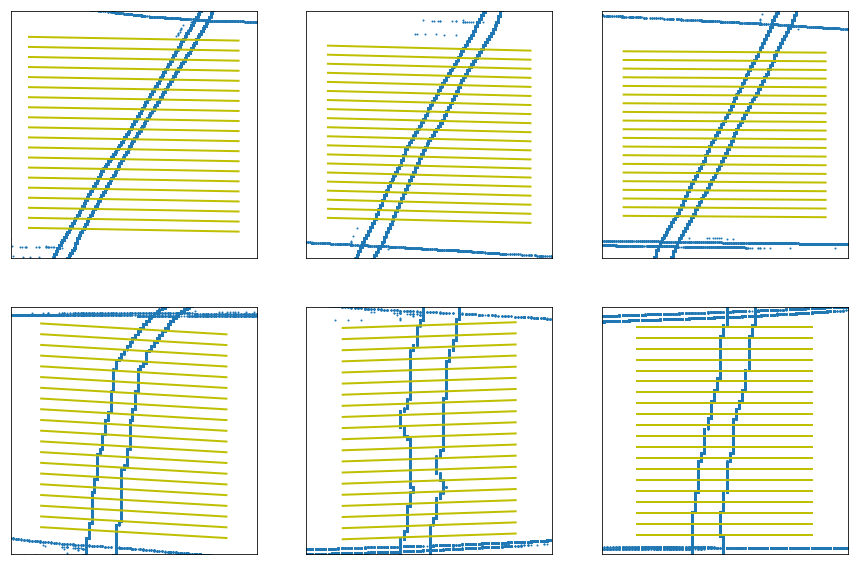

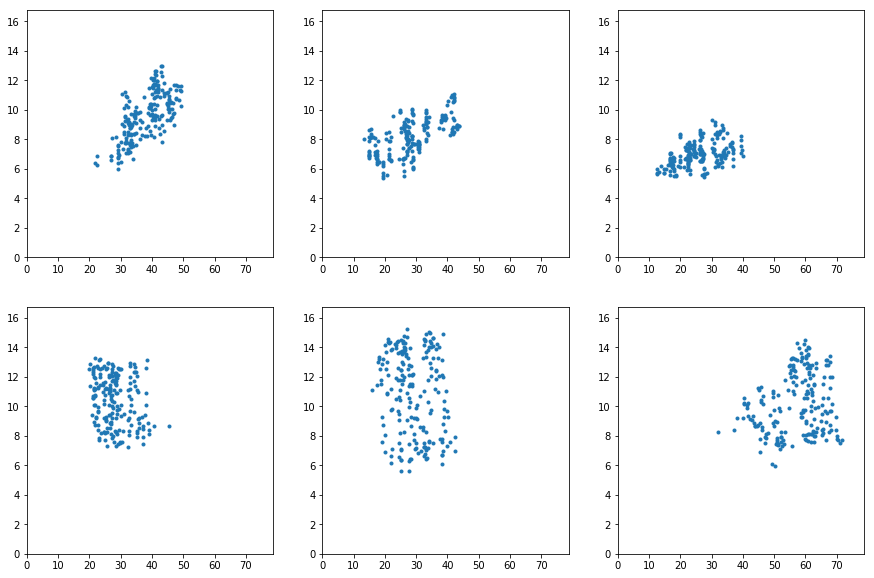

In [184]:
n = 20
direction = 1;
offset = 50
expand = 25
speed_down = np.zeros((6,10*n))
flow_down = np.zeros((6,10*n))
plt.figure(1)
plt.figure(figsize=(15,10)) 
for i_cross in range(1,7):
    a = min(cross_location.x_coordinate.iloc[i_cross],cross_location.x_coordinate.iloc[i_cross - 1]) - expand;
    b = max(cross_location.x_coordinate.iloc[i_cross],cross_location.x_coordinate.iloc[i_cross - 1]) + expand;
    horizon = np.linspace(cross_location.y_coordinate.iloc[i_cross] + offset, cross_location.y_coordinate.iloc[i_cross - 1] - offset, n)
    plt.subplot(2,3,i_cross)
    plt.xticks([]); plt.yticks([])
    plt.plot(data.x_coordinate, data.y_coordinate,'.',markersize = 2)
    plt.xlim([a - 0.5*expand, b + 0.5*expand ])
    plt.ylim([cross_location.y_coordinate.iloc[i_cross] - expand, cross_location.y_coordinate.iloc[i_cross - 1] + expand])
    for i in range(n):
        plt.plot([a, b], [horizon[i] - expand * k[1,i_cross], horizon[i] + expand * k[1,i_cross]], 'y',linewidth = 2)

    for j in range(10):
        for i in range(n):
            result = flow_horizon(k[1,i_cross],j,horizon[i],a,b,direction)
            speed_down[i_cross-1,n*j+i] = np.average(np.array(result[1][:,2],dtype = float))
            flow_down[i_cross-1,n*j+i] = result[0]
    print('No_cross.', i_cross,'speed:',np.average(speed_down[i_cross-1,:]), 'flow:', np.average(flow_down[i_cross-1,:]))
    sys.stdout.flush()
plt.figure(2)
plt.figure(figsize=(15,10)) 
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.xlim([0, 1.1*np.max(flow_down)])
    plt.ylim([0, 1.1*np.max(speed_down)])
    plt.plot(flow_down[i,:],speed_down[i,:],'.')
flow_down = np.average(flow_down,axis = 1)
speed_down = np.average(speed_down,axis = 1)
import csv
with open('flow_speed_down.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(flow_down)
    writer.writerow('')
    writer.writerow(speed_down)

No_cross. 1 No_interval. 9 speed: 11.064840845 flow: 47.1725721969
No_cross. 2 No_interval. 9 speed: 10.0552193614 flow: 45.4893979043
No_cross. 3 No_interval. 9 speed: 9.04347428692 flow: 44.4901859572
No_cross. 4 No_interval. 9 speed: 10.9191370264 flow: 26.5904099627
No_cross. 5 No_interval. 9 speed: 12.6443179187 flow: 33.5829938413
No_cross. 6 No_interval. 9 speed: 12.409279677 flow: 35.1321432422


TypeError: writerow() takes exactly one argument (0 given)

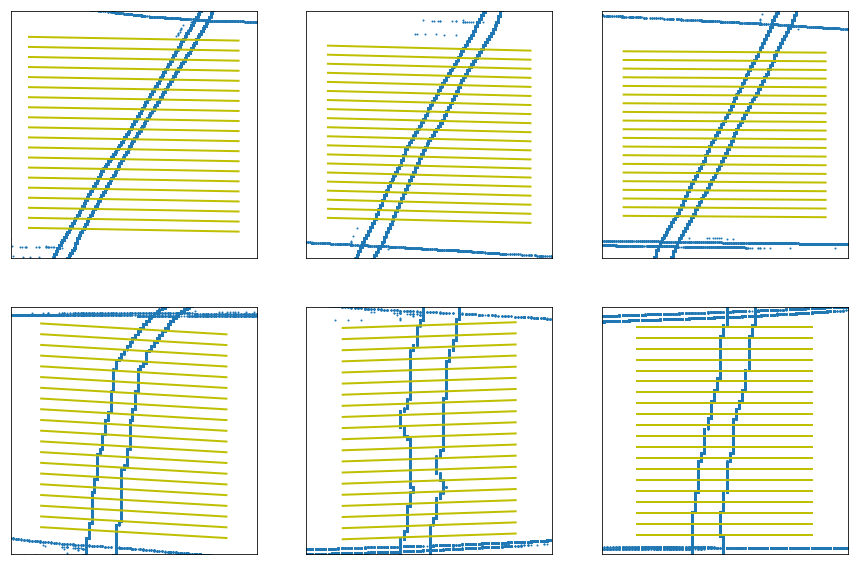

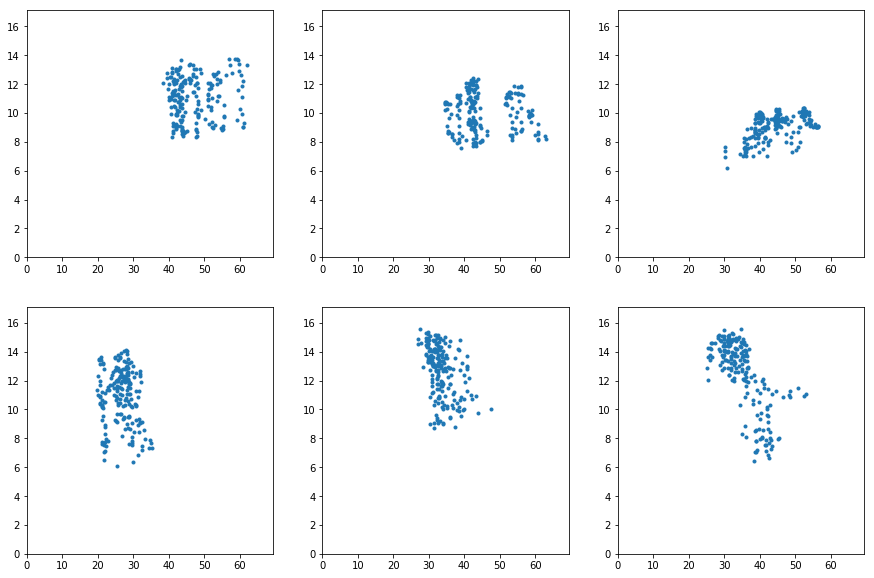

In [182]:
n = 20
direction = 0
offset = 50
expand = 25
speed_up = np.zeros((6,10*n))
flow_up = np.zeros((6,10*n))
plt.figure(1)
plt.figure(figsize=(15,10)) 
for i_cross in range(1,7):
    a = min(cross_location.x_coordinate.iloc[i_cross],cross_location.x_coordinate.iloc[i_cross - 1]) - expand;
    b = max(cross_location.x_coordinate.iloc[i_cross],cross_location.x_coordinate.iloc[i_cross - 1]) + expand;
    horizon = np.linspace(cross_location.y_coordinate.iloc[i_cross] + offset, cross_location.y_coordinate.iloc[i_cross - 1] - offset, n)
    plt.subplot(2,3,i_cross)
    plt.xticks([]); plt.yticks([])
    plt.plot(data.x_coordinate, data.y_coordinate,'.',markersize = 2)
    plt.xlim([a - 0.5*expand, b + 0.5*expand ])
    plt.ylim([cross_location.y_coordinate.iloc[i_cross] - expand, cross_location.y_coordinate.iloc[i_cross - 1] + expand])
    for i in range(n):
        plt.plot([a, b], [horizon[i] - expand * k[1,i_cross], horizon[i] + expand * k[1,i_cross]], 'y',linewidth = 2)

    for j in range(10):
        for i in range(n):
            result = flow_horizon(k[1,i_cross],j,horizon[i],a,b,direction)
            speed_up[i_cross-1,n*j+i] = np.average(np.array(result[1][:,2],dtype = float))
            flow_up[i_cross-1,n*j+i] = result[0]
    print('No_cross.', i_cross,'No_interval.', j, 'speed:',np.average(speed_up[i_cross-1,:]), 'flow:', np.average(flow_up[i_cross-1,:]))
    sys.stdout.flush()
plt.figure(2)
plt.figure(figsize=(15,10)) 
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.xlim([0, 1.1*np.max(flow_up)])
    plt.ylim([0, 1.1*np.max(speed_up)])
    plt.plot(flow_up[i,:],speed_up[i,:],'.')
flow_up = np.average(flow_up,axis = 1)
speed_up = np.average(speed_up,axis = 1)
import csv
with open('flow_speed_up.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(flow_up)
    writer.writerow('')
    writer.writerow(speed_up)

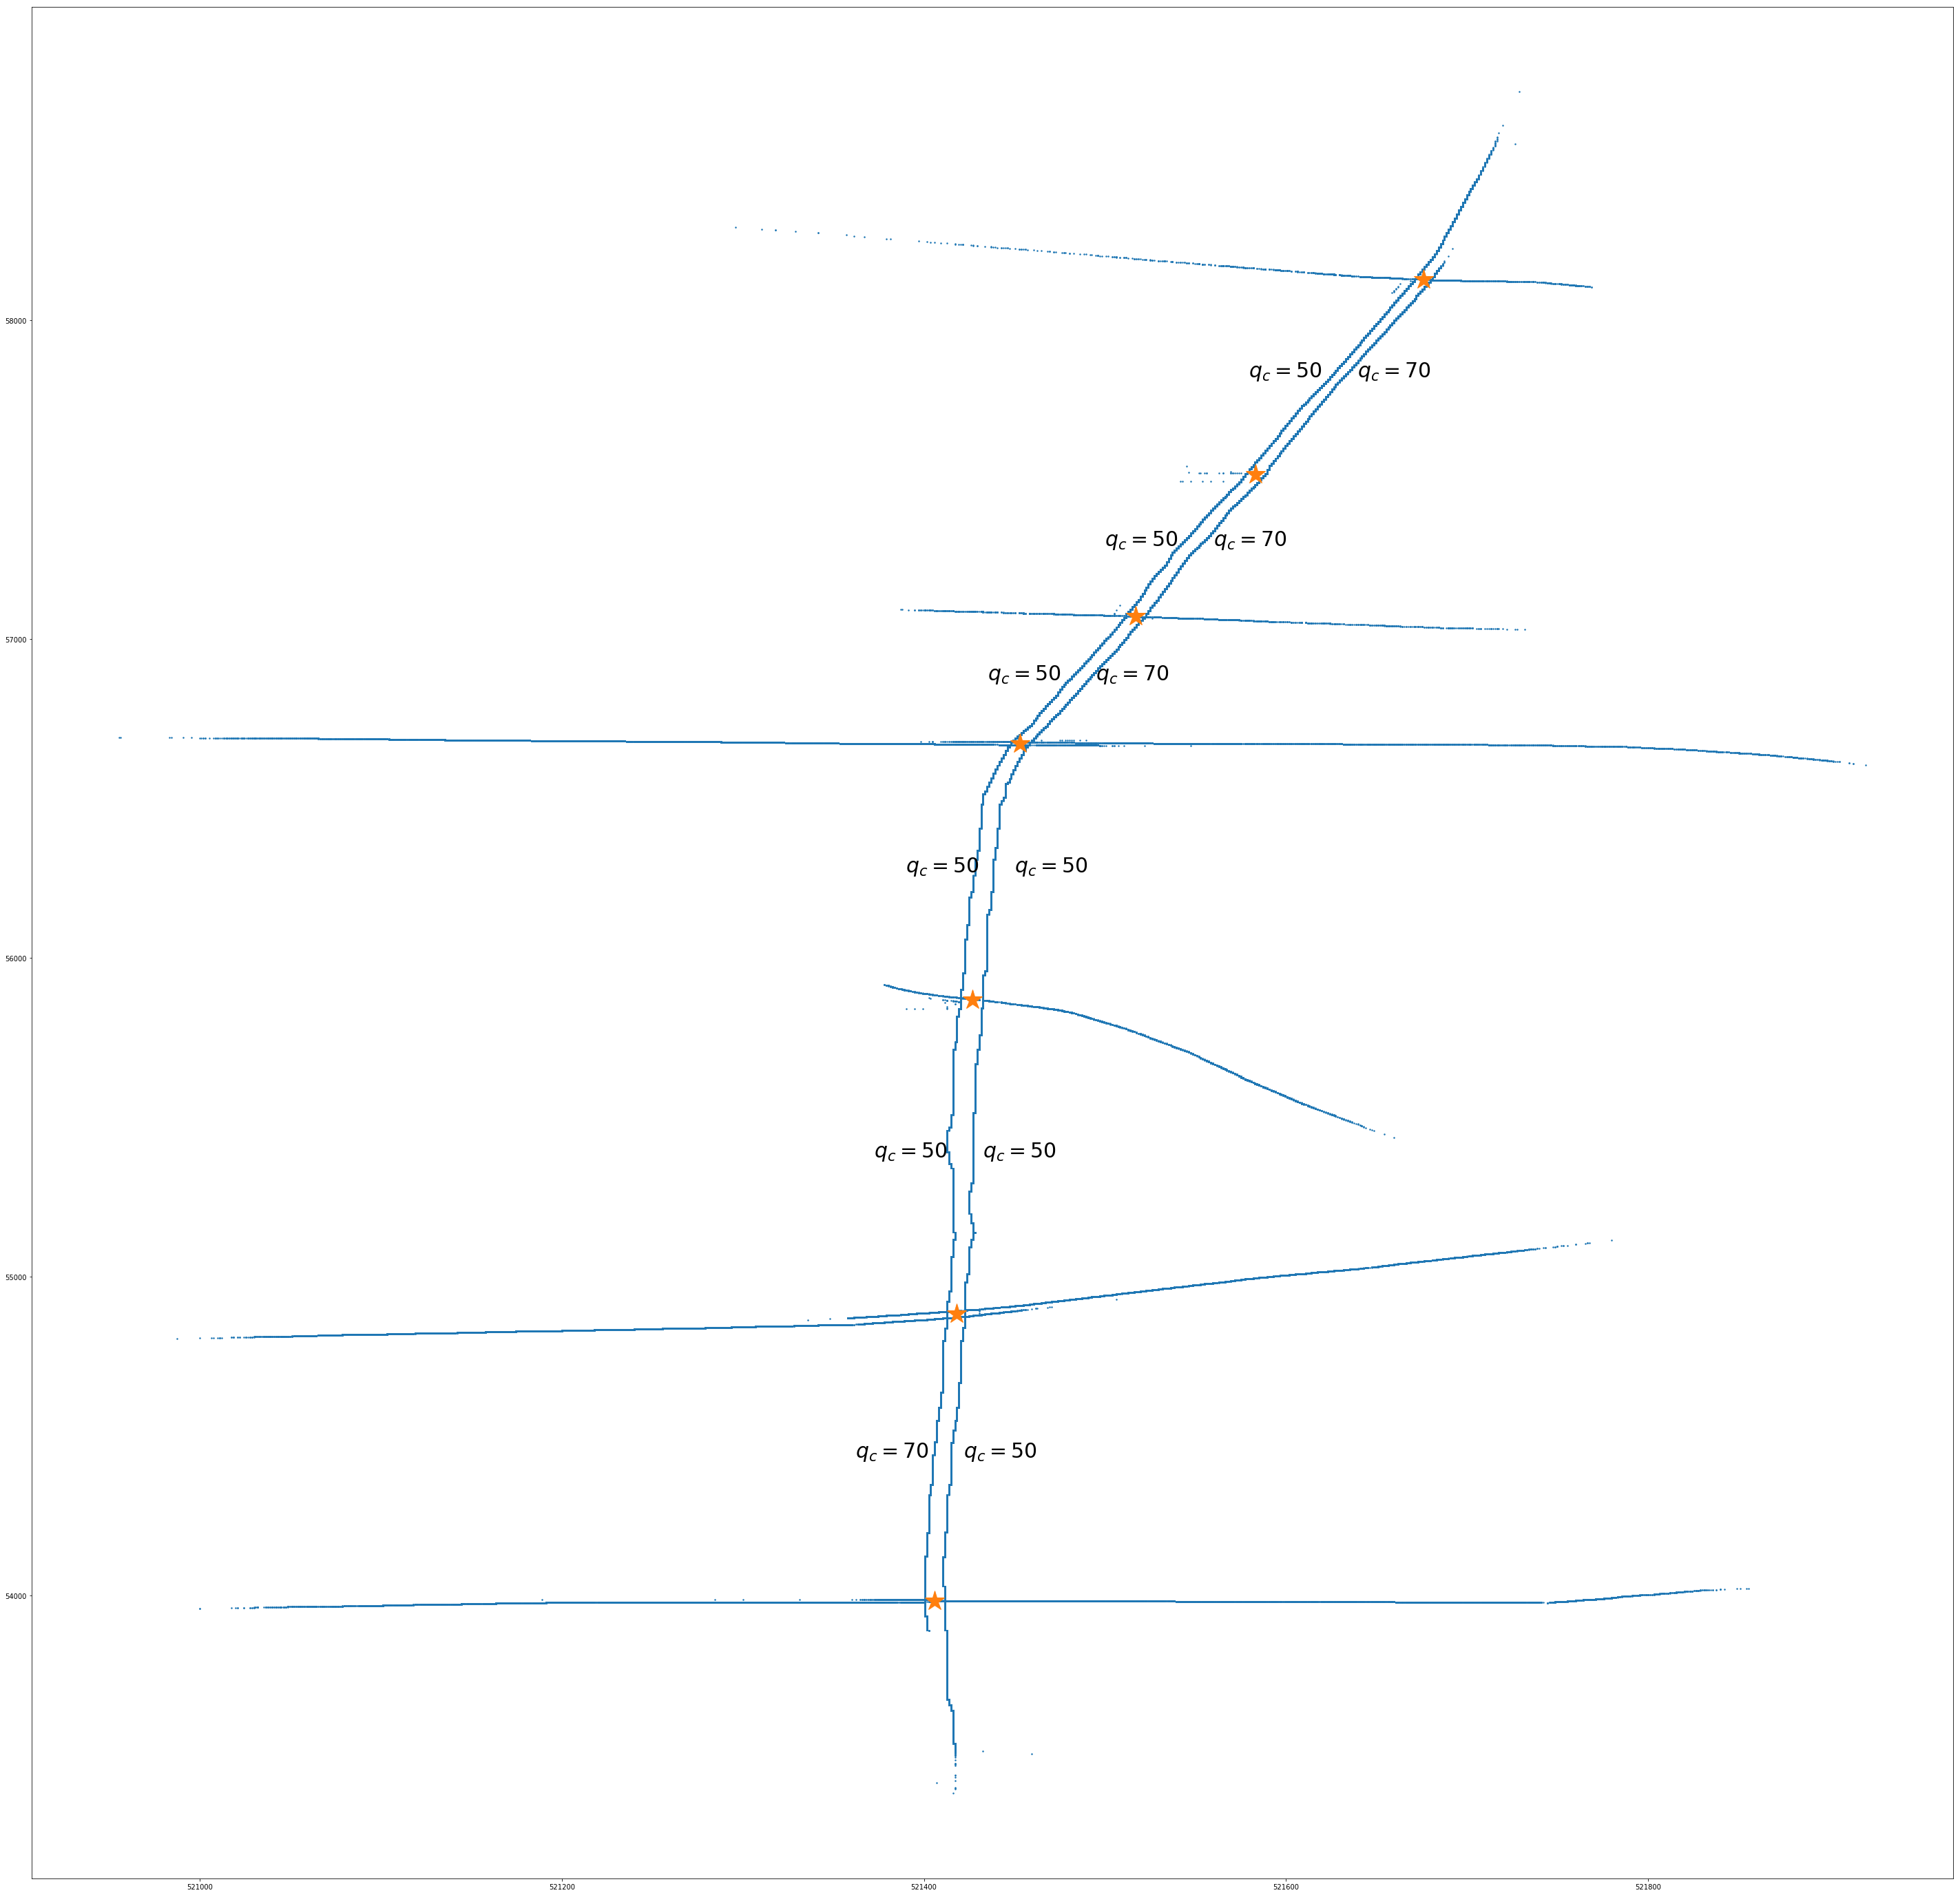

In [39]:
ax = plt.figure(figsize = (50,50))
plt.plot(data.x_coordinate, data.y_coordinate,'.',markersize = 3)
plt.plot(cross_location.x_coordinate,cross_location.y_coordinate,'*', markersize = 30)
#for i in range(7):
#    plt.text(cross_location.x_coordinate.iloc[i]-40,cross_location.y_coordinate.iloc[i]+30,'No.'+str(i+1),fontsize = 40,color = 'orange')
capacity = [70,50]
flow_max_up = [capacity[0],capacity[0],capacity[0],capacity[1],capacity[1],capacity[1]]
flow_max_down = [capacity[1],capacity[1],capacity[1],capacity[1],capacity[1],capacity[0]]
for i in range(1,7):
    x_text = (cross_location.x_coordinate.iloc[i]+cross_location.x_coordinate.iloc[i-1]) / 2 - 50
    y_text = (cross_location.y_coordinate.iloc[i]+cross_location.y_coordinate.iloc[i-1]) / 2 
    plt.text(x_text,y_text,'$q_c=$'+str(int(flow_max_down[i-1])),fontsize = 30,color = 'black')
    x_text = (cross_location.x_coordinate.iloc[i]+cross_location.x_coordinate.iloc[i-1]) / 2 + 10
    y_text = (cross_location.y_coordinate.iloc[i]+cross_location.y_coordinate.iloc[i-1]) / 2 
    plt.text(x_text,y_text,'$q_c=$'+str(int(flow_max_up[i-1])),fontsize = 30,color = 'black')
plt.savefig('trajectories.jpg')

(1494202000.0, 1494204000.0)

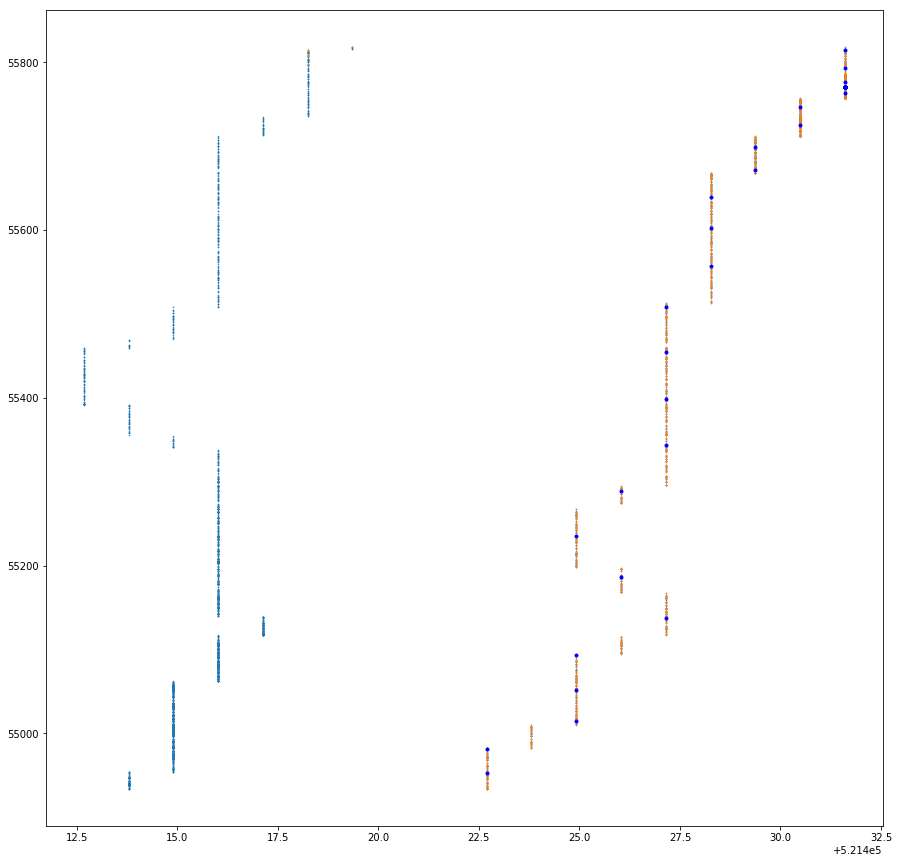

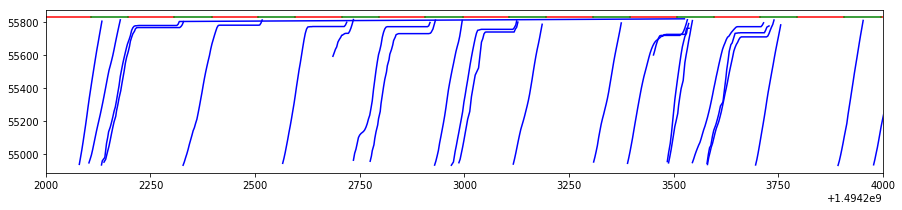

In [37]:
expand = 50
offset = 50
i_cross = 5
i_time = 2
a = min(cross_location.x_coordinate.iloc[i_cross],cross_location.x_coordinate.iloc[i_cross - 1]) - expand;
b = max(cross_location.x_coordinate.iloc[i_cross],cross_location.x_coordinate.iloc[i_cross - 1]) + expand;
c = min(cross_location.y_coordinate.iloc[i_cross],cross_location.y_coordinate.iloc[i_cross - 1]) + offset;
d = max(cross_location.y_coordinate.iloc[i_cross],cross_location.y_coordinate.iloc[i_cross - 1]) - offset;

data_test1 = data[data.time>=data_time[i_time,0]][data.time<=data_time[i_time,1]]
data_test = data_test1[data_test1.x_coordinate>a][data_test1.x_coordinate<b][data_test1.y_coordinate>c][data_test1.y_coordinate<d]

ax = plt.figure(figsize = (15,15))
plt.plot(data_test.x_coordinate, data_test.y_coordinate,'.',markersize = 1)
for i in data_test.vehicle_id.drop_duplicates():
    result = scipy.stats.linregress(data_test.time[data_test.vehicle_id == i],data_test.y_coordinate[data_test.vehicle_id == i])[0]
    if (result < 0.2):
        data_test.drop(data_test[data_test.vehicle_id == i].index,inplace = True);
plt.plot(data_test.x_coordinate, data_test.y_coordinate,'.',markersize = 1)
data_test2 = data_test[data_test.vehicle_id == data_test.vehicle_id.iloc[0]]
plt.plot(data_test2.x_coordinate, data_test2.y_coordinate,'b.')

#for i in data_test.vehicle_id.drop_duplicates():
#data_test2 = data_test[data_test.vehicle_id == i]
time = np.array(data_test.time)
y_coordinate = np.array(data_test.y_coordinate)
speed = np.array(data_test.speed)

plt.figure(2)
plt.figure(figsize=(15,3)) 
for i in data_test.vehicle_id.drop_duplicates():
    data_test2 = data_test[data_test.vehicle_id == i]
    plt.plot(data_test2.time, data_test2.y_coordinate,'b')

start = min(data_test.time) + 120
for i in range(70):
    plt.plot([start+i*200+89,start+i*200+200],[d+10,d+10],'r')
    plt.plot([start+i*200,start+i*200+89],[d+10,d+10],'g')
plt.xlim([2000+1.4942e9,4000+1.4942e9])

In [177]:
def flow_verticle(k,j, x_line, y_A, y_B, direction):
    data_record = [];
    data_temp = data[data.time>=data_time[j][0]][data.time<=data_time[j][1]][data.y_coordinate<=(y_B+OFFSET)][data.y_coordinate>=(y_A-OFFSET)]
    data_temp = data_temp[data_temp.x_coordinate<=(x_line+OFFSET)][data_temp.x_coordinate>=(x_line-OFFSET)]
    judge = data_temp.x_coordinate - ((data_temp.y_coordinate - (y_A + y_B) / 2) / k + x_line)
    for i in range(len(data_temp) - 1):
        if (judge.iloc[i+direction] < 0)&(judge.iloc[i+1-direction] > 0)&(data_temp.vehicle_id.iloc[i+1] == data_temp.vehicle_id.iloc[i])&(data_temp.time.iloc[i+1] <= data_temp.time.iloc[i] + 12):
            data_record.append([data_temp.time.iloc[i], data_temp.vehicle_id.iloc[i],(data_temp.speed.iloc[i] + data_temp.speed.iloc[i+1]) / 2]);
    data_record = np.array(sorted(data_record, key = lambda x:x[0]))
    if len(data_record) >= 1:
        result = scipy.stats.linregress(np.array(data_record[:,0],dtype = int),range(len(data_record)))[0] 
    else:
        result = 0
    return [result * 3600, data_record]

def flow_horizon(k,j, y_line, x_A, x_B, direction):
    data_record = [];
    data_temp = data[data.time>=data_time[j][0]][data.time<=data_time[j][1]][data.x_coordinate<=(x_B+OFFSET)][data.x_coordinate>=(x_A-OFFSET)]
    data_temp = data_temp[data_temp.y_coordinate<=(y_line+OFFSET)][data_temp.y_coordinate>=(y_line-OFFSET)]
    judge = data_temp.y_coordinate - ((data_temp.x_coordinate - (x_A + x_B) / 2) * k + y_line)
    for i in range(len(data_temp) - 1):
        if (judge.iloc[i+direction] < 0)&(judge.iloc[i+1-direction] > 0)&(data_temp.vehicle_id.iloc[i+1] == data_temp.vehicle_id.iloc[i])&(data_temp.time.iloc[i+1] <= data_temp.time.iloc[i] + 12):
            data_record.append([data_temp.time.iloc[i], data_temp.vehicle_id.iloc[i],(data_temp.speed.iloc[i] + data_temp.speed.iloc[i+1]) / 2]);
    data_record = np.array(sorted(data_record, key = lambda x:x[0]))
    if len(data_record) >= 1:
        result = scipy.stats.linregress(np.array(data_record[:,0],dtype = int),range(len(data_record)))[0]
    else:
        result = 0
    return [result * 3600, data_record]

def OD_cell(data_1, data_2):
    count = 0;
    for i in range(len(data_1)):
        if (data_1[i,1] in data_2):
            if abs(int(data_1[i,0]) - int(data_2[np.argwhere(data_2 == data_1[i,1])[0,0],0])) <= 300:
                count += 1
    return count

OD = np.zeros((7,4,4))
OD_temp = np.zeros((7,10,4,4))
j = 7
i = 5
a = cross_location.x_coordinate.iloc[i] - offset;
b = cross_location.x_coordinate.iloc[i] + offset;
c = cross_location.y_coordinate.iloc[i] - offset;
d = cross_location.y_coordinate.iloc[i] + offset;
OD_temp[i,j,0,0] = OD_cell(flow_verticle(k[0,i],j,a,c,d,0)[1], flow_verticle(k[0,i],j,a,c,d,1)[1])
OD_temp[i,j,0,1] = OD_cell(flow_verticle(k[0,i],j,a,c,d,0)[1], flow_horizon(k[1,i],j,d,a,b,0)[1])
OD_temp[i,j,0,2] = OD_cell(flow_verticle(k[0,i],j,a,c,d,0)[1], flow_verticle(k[0,i],j,b,c,d,0)[1])
OD_temp[i,j,0,3] = OD_cell(flow_verticle(k[0,i],j,a,c,d,0)[1], flow_horizon(k[1,i],j,c,a,b,1)[1])
print (j,'interval,',i,'crosses, OD_counts for left vehicles: ', OD_temp[i,j,0,:])
sys.stdout.flush()
OD_temp[i,j,1,0] = OD_cell(flow_horizon(k[1,i],j,d,a,b,1)[1], flow_verticle(k[0,i],j,a,c,d,1)[1])
OD_temp[i,j,1,1] = OD_cell(flow_horizon(k[1,i],j,d,a,b,1)[1], flow_horizon(k[1,i],j,d,a,b,0)[1])
OD_temp[i,j,1,2] = OD_cell(flow_horizon(k[1,i],j,d,a,b,1)[1], flow_verticle(k[0,i],j,b,c,d,0)[1])
OD_temp[i,j,1,3] = OD_cell(flow_horizon(k[1,i],j,d,a,b,1)[1], flow_horizon(k[1,i],j,c,a,b,1)[1])
print (j,'interval,',i,'crosses, OD_counts for up vehicles:   ', OD_temp[i,j,1,:])
sys.stdout.flush()
OD_temp[i,j,2,0] = OD_cell(flow_verticle(k[0,i],j,b,c,d,1)[1], flow_verticle(k[0,i],j,a,c,d,1)[1])
OD_temp[i,j,2,1] = OD_cell(flow_verticle(k[0,i],j,b,c,d,1)[1], flow_horizon(k[1,i],j,d,a,b,0)[1])
OD_temp[i,j,2,2] = OD_cell(flow_verticle(k[0,i],j,b,c,d,1)[1], flow_verticle(k[0,i],j,b,c,d,0)[1])
OD_temp[i,j,2,3] = OD_cell(flow_verticle(k[0,i],j,b,c,d,1)[1], flow_horizon(k[1,i],j,c,a,b,1)[1])
print (j,'interval,',i,'crosses, OD_counts for right vehicles: ', OD_temp[i,j,2,:])
sys.stdout.flush()
OD_temp[i,j,3,0] = OD_cell(flow_horizon(k[1,i],j,c,a,b,0)[1], flow_verticle(k[0,i],j,a,c,d,1)[1])
OD_temp[i,j,3,1] = OD_cell(flow_horizon(k[1,i],j,c,a,b,0)[1], flow_horizon(k[1,i],j,d,a,b,0)[1])
OD_temp[i,j,3,2] = OD_cell(flow_horizon(k[1,i],j,c,a,b,0)[1], flow_verticle(k[0,i],j,b,c,d,0)[1])
OD_temp[i,j,3,3] = OD_cell(flow_horizon(k[1,i],j,c,a,b,0)[1], flow_horizon(k[1,i],j,c,a,b,1)[1])
print (j,'interval,',i,'crosses, OD_counts for down vehicles:  ', OD_temp[i,j,3,:])
sys.stdout.flush()
OD_temp[i,j] = np.divide(OD_temp[i,j], (data_time[j,1] - data_time[j,0]) / 3600)

7 interval, 5 crosses, OD_counts for left vehicles:  [  0.  23.  40.   0.]
7 interval, 5 crosses, OD_counts for up vehicles:    [  1.   0.   6.  57.]
7 interval, 5 crosses, OD_counts for right vehicles:  [ 46.   0.   1.  23.]
7 interval, 5 crosses, OD_counts for down vehicles:   [ 21.  53.   0.   0.]


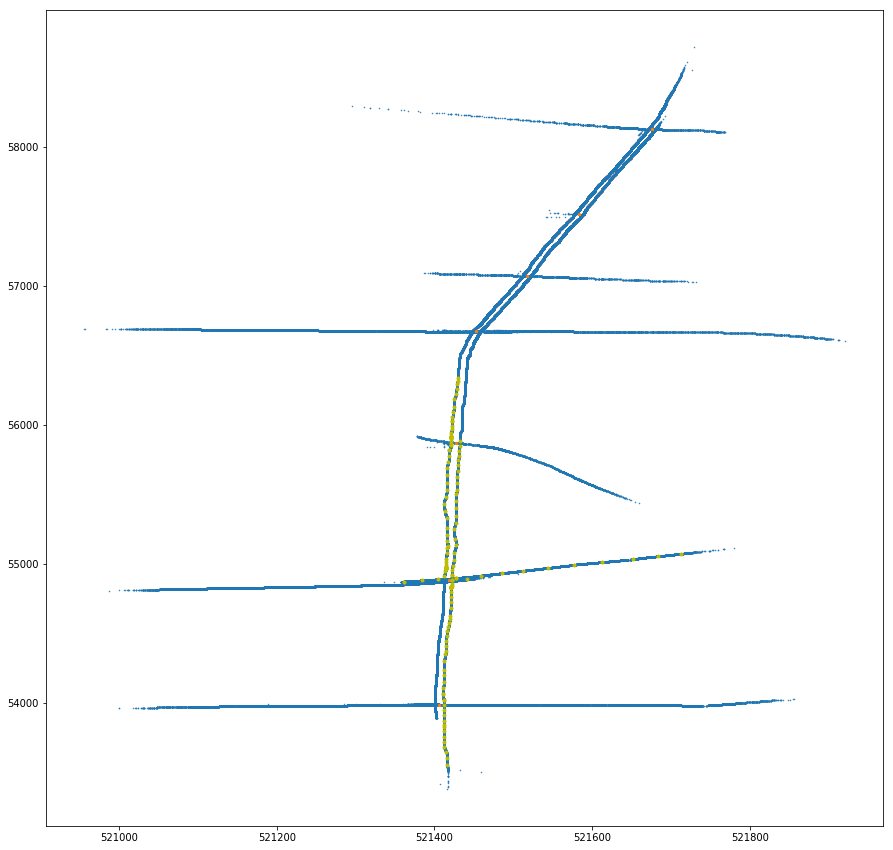

In [7]:
dataso = data[data.vehicle_id == 'd5de7d622d948d6de0667fdf185035bc']

ax = plt.figure(figsize = (15,15))
plt.plot(data.x_coordinate, data.y_coordinate,'.',markersize = 1)
plt.plot(cross_location.x_coordinate,cross_location.y_coordinate,'*', markersize = 3)
plt.plot(dataso.x_coordinate, dataso.y_coordinate,'y.')